## Link of used dataset:
https://www.kaggle.com/datasets/mahdimashayekhi/disease-risk-from-daily-habits

## Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', None)

## Download data and examine

In [ ]:
health_df = pd.read_csv("/content/drive/MyDrive/Dokümantasyon/7. Hafta/Main Project: Health Analysis/health_lifestyle_classification.csv")
health_df.head()

,survey_code,age,gender,height,weight,bmi,bmi_estimated,bmi_scaled,bmi_corrected,waist_size,blood_pressure,heart_rate,cholesterol,glucose,insulin,sleep_hours,sleep_quality,work_hours,physical_activity,daily_steps,calorie_intake,sugar_intake,alcohol_consumption,smoking_level,water_intake,screen_time,stress_level,mental_health_score,mental_health_support,education_level,job_type,occupation,income,diet_type,exercise_type,device_usage,healthcare_access,insurance,sunlight_exposure,meals_per_day,caffeine_intake,family_history,pet_owner,electrolyte_level,gene_marker_flag,environmental_risk_score,daily_supplement_dosage,target
0,1,56,Male,173.416872,56.886640,18.915925,18.915925,56.747776,18.989117,72.165130,118.264254,60.749825,214.580523,103.008176,NaN,6.475885,Fair,7.671313,0.356918,13320.942595,2673.546960,44.476887,NaN,Non-smoker,1.694262,5.003963,2,8,No,PhD,Tech,Farmer,6759.821719,Vegan,Strength,High,Poor,No,High,5,Moderate,No,Yes,0,1.0,5.5,-2.275502,healthy
1,2,69,Female,163.207380,97.799859,36.716278,36.716278,110.148833,36.511417,85.598889,117.917986,66.463696,115.794002,116.905134,10.131597,8.428410,Good,9.515198,0.568219,11911.201401,2650.376972,74.663405,Regularly,Light,0.716409,5.925455,3,9,No,High School,Office,Engineer,6240.517690,Vegan,Cardio,Moderate,Moderate,No,High,5,High,Yes,No,0,1.0,5.5,6.239340,healthy
2,3,46,Male,177.281966,80.687562,25.673050,25.673050,77.019151,25.587429,90.295030,123.073698,76.043212,138.134787,89.180302,NaN,5.702164,Poor,5.829853,3.764406,2974.035375,1746.755144,19.702382,Regularly,Heavy,2.487900,4.371250,0,1,No,Master,Office,Teacher,3429.179266,Vegan,Cardio,High,Good,Yes,High,4,Moderate,No,No,0,1.0,5.5,5.423737,healthy
3,4,32,Female,172.101255,63.142868,21.318480,21.318480,63.955440,21.177109,100.504211,148.173453,68.781981,203.017447,128.375798,18.733179,5.188316,Good,9.489693,0.889474,5321.539497,2034.193242,82.580050,Occasionally,Heavy,2.643335,4.116064,10,4,No,Master,Labor,Teacher,2618.503534,Vegetarian,Mixed,Low,Moderate,No,High,1,NaN,No,Yes,0,1.0,5.5,8.388611,healthy
4,5,60,Female,163.608816,40.000000,14.943302,14.943302,44.829907,14.844299,69.021150,150.613181,92.335358,200.412439,94.813332,16.038701,7.912514,Good,7.275450,2.901608,9791.376712,2386.210257,45.961322,NaN,Heavy,1.968393,3.180087,9,7,Yes,Master,Unemployed,Doctor,3662.086276,Vegan,NaN,Low,Moderate,Yes,High,1,High,Yes,Yes,0,1.0,5.5,0.332622,healthy


In [ ]:
health_df.shape

(100000, 48)

In [ ]:
health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 48 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   survey_code               100000 non-null  int64  
 1   age                       100000 non-null  int64  
 2   gender                    100000 non-null  object 
 3   height                    100000 non-null  float64
 4   weight                    100000 non-null  float64
 5   bmi                       100000 non-null  float64
 6   bmi_estimated             100000 non-null  float64
 7   bmi_scaled                100000 non-null  float64
 8   bmi_corrected             100000 non-null  float64
 9   waist_size                100000 non-null  float64
 10  blood_pressure            92331 non-null   float64
 11  heart_rate                85997 non-null   float64
 12  cholesterol               100000 non-null  float64
 13  glucose                   100000 non-null  fl

In [ ]:
health_df.isnull().sum().sort_values()

,0
survey_code,0
age,0
gender,0
height,0
weight,0
bmi,0
bmi_estimated,0
bmi_scaled,0
bmi_corrected,0
waist_size,0


## A new dataframe: inference about columns

In [ ]:
def smart_round(x):
    return float(f"{x:.5f}".rstrip("0").rstrip("."))

variable_name = []
total_entry = []
missing_entry = []
missing_ratio = []
data_type = []
unique_values = []
max_value = []
min_value = []

for col in health_df.columns:
  variable_name.append(col)
  total_entry.append(health_df[col].shape[0])
  missing_entry.append(health_df[col].isnull().sum())
  missing_ratio.append(missing_entry[-1]/total_entry[-1])
  if health_df[col].dtype=='int':
      max_value.append(health_df[col].max())
      min_value.append(health_df[col].min())
  else:
    try:
      health_df[col] = health_df[col].astype(float)
      max_value.append(smart_round(health_df[col].max()))
      min_value.append(smart_round(health_df[col].min()))
    except:
      health_df[col] = health_df[col].astype(object)
      max_value.append("-")
      min_value.append("-")
  data_type.append(health_df[col].dtype)
  unique_values.append(health_df[col].unique())

data_info_df = pd.DataFrame({
    "Variable":variable_name,
    "Total Entry":total_entry,
    "Missing Value":missing_entry,
    "Missing Ratio":missing_ratio,
    "Data Type":data_type,
    "Unique Values":unique_values,
    "# Unique Values":list(map(len, unique_values)),
    "Max Values":max_value,
    "Min Values":min_value,
})

data_info_df = data_info_df.sort_values(by="Missing Value",ascending=False)
data_info_df # int olanlar int olarak kalmalı

,Variable,Total Entry,Missing Value,Missing Ratio,Data Type,Unique Values,# Unique Values,Max Values,Min Values
22,alcohol_consumption,100000,42387,0.42387,object,"[nan, Regularly, Occasionally]",3,-,-
40,caffeine_intake,100000,33261,0.33261,object,"[Moderate, High, nan]",3,-,-
34,exercise_type,100000,24969,0.24969,object,"[Strength, Cardio, Mixed, nan]",4,-,-
14,insulin,100000,15836,0.15836,float64,"[nan, 10.131597441685196, 18.733179433216204, ...",84165,35.46475,-6.79448
11,heart_rate,100000,14003,0.14003,float64,"[60.74982466991912, 66.46369626262035, 76.0432...",85998,114.13604,34.74509
44,gene_marker_flag,100000,10474,0.10474,float64,"[1.0, nan]",2,1.0,1.0
32,income,100000,8470,0.08470,float64,"[6759.82171934488, 6240.517689877877, 3429.179...",87873,12029.40935,500.0
19,daily_steps,100000,8329,0.08329,float64,"[13320.942594565737, 11911.201400998543, 2974....",90935,18064.96954,1000.0
10,blood_pressure,100000,7669,0.07669,float64,"[118.26425414158744, 117.9179857675427, 123.07...",92332,184.4392,59.12817
6,bmi_estimated,100000,0,0.00000,float64,"[18.915925255480552, 36.71627770033372, 25.673...",99996,59.23479,9.98849


## Download the data, son that we can make changes on it

In [ ]:
data_info_df.to_csv("data_info.csv", index=False, encoding="utf-8")

## To do list:

*   Variable Structures' will be determined
*   Data Type will be adjusted



## **Make sure everything is okay before continuing**

In [ ]:
data_info_df = pd.read_csv("/content/drive/MyDrive/Dokümantasyon/7. Hafta/Main Project: Health Analysis/data info - Sayfa1.csv")
data_info_df.head()

,Variable,Total Entry,Missing Value,Missing Ratio,Data Type,Unique Values,# Unique Values,Max Values,Min Values,Variable Structure
0,alcohol_consumption,100000,42387,0.42387,object,[nan 'Regularly' 'Occasionally'],3,-,-,Ordinal
1,caffeine_intake,100000,33261,0.33261,object,['Moderate' 'High' nan],3,-,-,Ordinal
2,exercise_type,100000,24969,0.24969,object,['Strength' 'Cardio' 'Mixed' nan],4,-,-,Nominal
3,insulin,100000,15836,0.15836,float64,[ nan 10.13159744 18.73317943 ... 17.80...,84165,35.46475,-6.79448,Continuous-Ratio
4,heart_rate,100000,14003,0.14003,float64,[60.74982467 66.46369626 76.04321196 ... 56.33...,85998,114.13604,34.74509,Continuous-Ratio


In [ ]:
data_info_df["Data Type"].value_counts()

,count
Data Type,
float64,24
object,18
int64,6


In [ ]:
data_info_df[data_info_df["Data Type"]=='int64'] # bazı unique value tipleri ve variable structure'lar uyuşmamakta

,Variable,Total Entry,Missing Value,Missing Ratio,Data Type,Unique Values,# Unique Values,Max Values,Min Values,Variable Structure
11,survey_code,100000,0,0.0,int64,[ 1 2 3 ... 99998 99999 100000],100000,100000,1,Index
13,age,100000,0,0.0,int64,[56 69 46 32 60 25 78 38 75 36 40 28 41 70 53 ...,62,79,18,Cardinal
26,stress_level,100000,0,0.0,int64,[ 2 3 0 10 9 7 6 5 1 4 8],11,10,0,Ordinal
27,mental_health_score,100000,0,0.0,int64,[ 8 9 1 4 7 6 2 3 5 0 10],11,10,0,Ordinal
40,meals_per_day,100000,0,0.0,int64,[5 4 1 2 3],5,5,1,Ordinal
44,electrolyte_level,100000,0,0.0,int64,[0],1,0,0,Single


In [ ]:
data_info_df["Variable Structure"].value_counts()

,count
Variable Structure,
Continuous-Ratio,21
Ordinal,11
Nominal,11
Single,2
Index,1
Cardinal,1
Continuous-Interval,1


In [ ]:
data_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Variable            48 non-null     object 
 1   Total Entry         48 non-null     int64  
 2   Missing Value       48 non-null     int64  
 3   Missing Ratio       48 non-null     float64
 4   Data Type           48 non-null     object 
 5   Unique Values       48 non-null     object 
 6   # Unique Values     48 non-null     int64  
 7   Max Values          48 non-null     object 
 8   Min Values          48 non-null     object 
 9   Variable Structure  48 non-null     object 
dtypes: float64(1), int64(3), object(6)
memory usage: 3.9+ KB


Index is survey_code, which we will not use in our model. Single represents columns with only one value, which are also will not be used.

Text(0.5, 1.0, 'Target Count Graph')

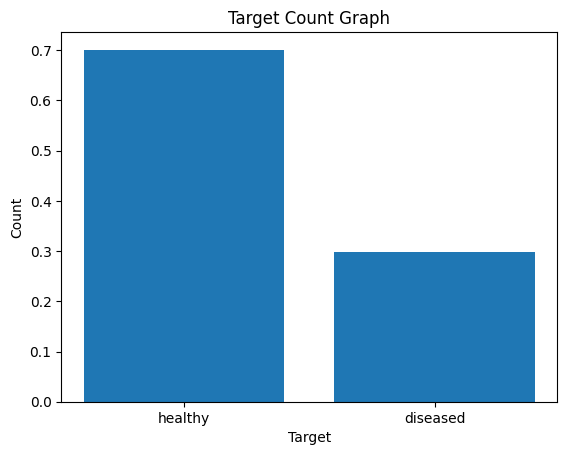

In [ ]:
counts = health_df['target'].value_counts(normalize=True)
plt.bar(counts.index, counts.values)
plt.xlabel("Target")
plt.ylabel("Count")
plt.title("Target Count Graph")

## Examining Alcohol Consumption

In [ ]:
health_df['alcohol_consumption'].value_counts()

,count
alcohol_consumption,
Occasionally,28831
Regularly,28782


In [ ]:
def mapping(alc):
  if alc=="Occasionally":
    return 1
  elif alc=="Regularly":
    return 2
  else:
    return 0
temp_df = pd.DataFrame({})
temp_df['alcohol_consumption'] = health_df['alcohol_consumption'].apply(mapping)
temp_df["gene_marker_flag"] = health_df['gene_marker_flag'].map({1:1,None:0})
temp_df["target"] = health_df['target']

In [ ]:
pd.crosstab(temp_df["alcohol_consumption"],temp_df["target"], normalize=True)
# Imputation Kullanılacak, boş değerleri doldurmak adına

target,diseased,healthy
alcohol_consumption,,
0,0.12847,0.29540
1,0.08552,0.20279
2,0.08504,0.20278


In [ ]:
pd.crosstab(temp_df["gene_marker_flag"],temp_df["target"], normalize=True)

target,diseased,healthy
gene_marker_flag,,
0,0.03078,0.07396
1,0.26825,0.62701


## Viewing correlation

<Axes: >

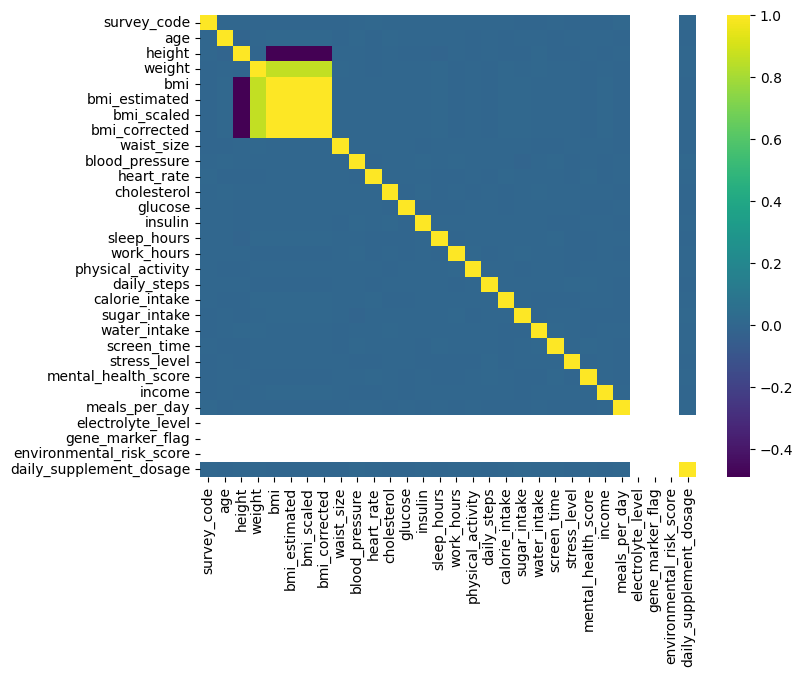

In [ ]:
health_df_numeric = health_df.select_dtypes(include=[np.number])
corr_matrix = health_df_numeric.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, cmap='viridis')
# bmi lardan biri seçilecek ve onun üzerinden ilerlenecek

## Drop highly correlated columns

In [ ]:
hcc = ["bmi_estimated","bmi_scaled","bmi_corrected"]
if all(col in health_df.columns for col in hcc):
    health_df = health_df.drop(columns=hcc) # main df changed
    print("Dropped specified columns.")
else:
    print("Not all specified columns were present.")
print(health_df.columns)

Dropped specified columns.
Index(['survey_code', 'age', 'gender', 'height', 'weight', 'bmi', 'waist_size',
       'blood_pressure', 'heart_rate', 'cholesterol', 'glucose', 'insulin',
       'sleep_hours', 'sleep_quality', 'work_hours', 'physical_activity',
       'daily_steps', 'calorie_intake', 'sugar_intake', 'alcohol_consumption',
       'smoking_level', 'water_intake', 'screen_time', 'stress_level',
       'mental_health_score', 'mental_health_support', 'education_level',
       'job_type', 'occupation', 'income', 'diet_type', 'exercise_type',
       'device_usage', 'healthcare_access', 'insurance', 'sunlight_exposure',
       'meals_per_day', 'caffeine_intake', 'family_history', 'pet_owner',
       'electrolyte_level', 'gene_marker_flag', 'environmental_risk_score',
       'daily_supplement_dosage', 'target'],
      dtype='object')


## Drop Single value columns

In [ ]:
columns_to_drop = ["electrolyte_level", "environmental_risk_score","gene_marker_flag"]
if all(col in health_df.columns for col in columns_to_drop):
    health_df = health_df.drop(columns=columns_to_drop) # main df changed
    print("Dropped specified columns.")
else:
    print("Not all specified columns were present.")
print(health_df.columns)

Dropped specified columns.
Index(['survey_code', 'age', 'gender', 'height', 'weight', 'bmi', 'waist_size',
       'blood_pressure', 'heart_rate', 'cholesterol', 'glucose', 'insulin',
       'sleep_hours', 'sleep_quality', 'work_hours', 'physical_activity',
       'daily_steps', 'calorie_intake', 'sugar_intake', 'alcohol_consumption',
       'smoking_level', 'water_intake', 'screen_time', 'stress_level',
       'mental_health_score', 'mental_health_support', 'education_level',
       'job_type', 'occupation', 'income', 'diet_type', 'exercise_type',
       'device_usage', 'healthcare_access', 'insurance', 'sunlight_exposure',
       'meals_per_day', 'caffeine_intake', 'family_history', 'pet_owner',
       'daily_supplement_dosage', 'target'],
      dtype='object')


In [ ]:
health_df.shape

(100000, 42)

<Axes: >

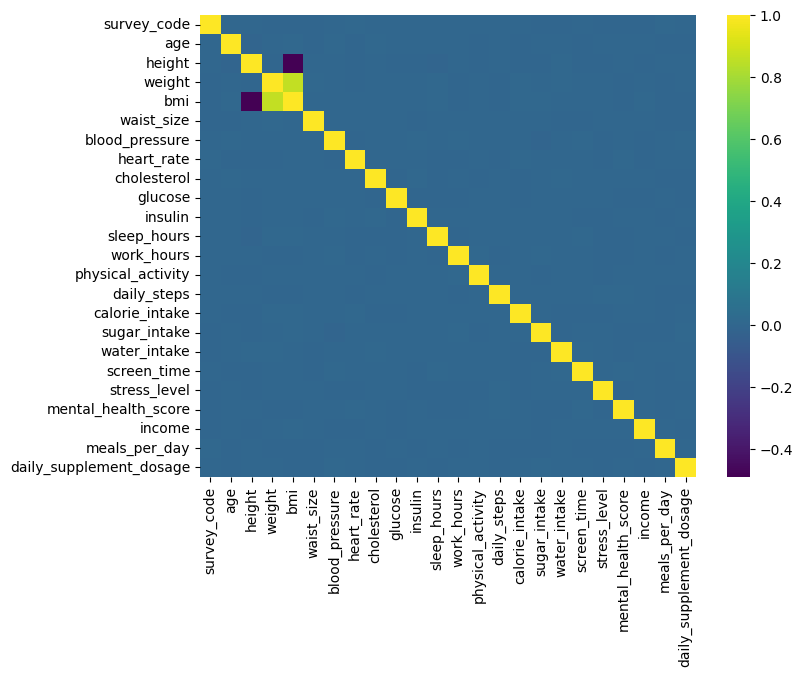

In [ ]:
health_df_numeric = health_df.select_dtypes(include=[np.number])
corr_matrix = health_df_numeric.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, cmap='viridis')

## Correlation between null values

<Axes: >

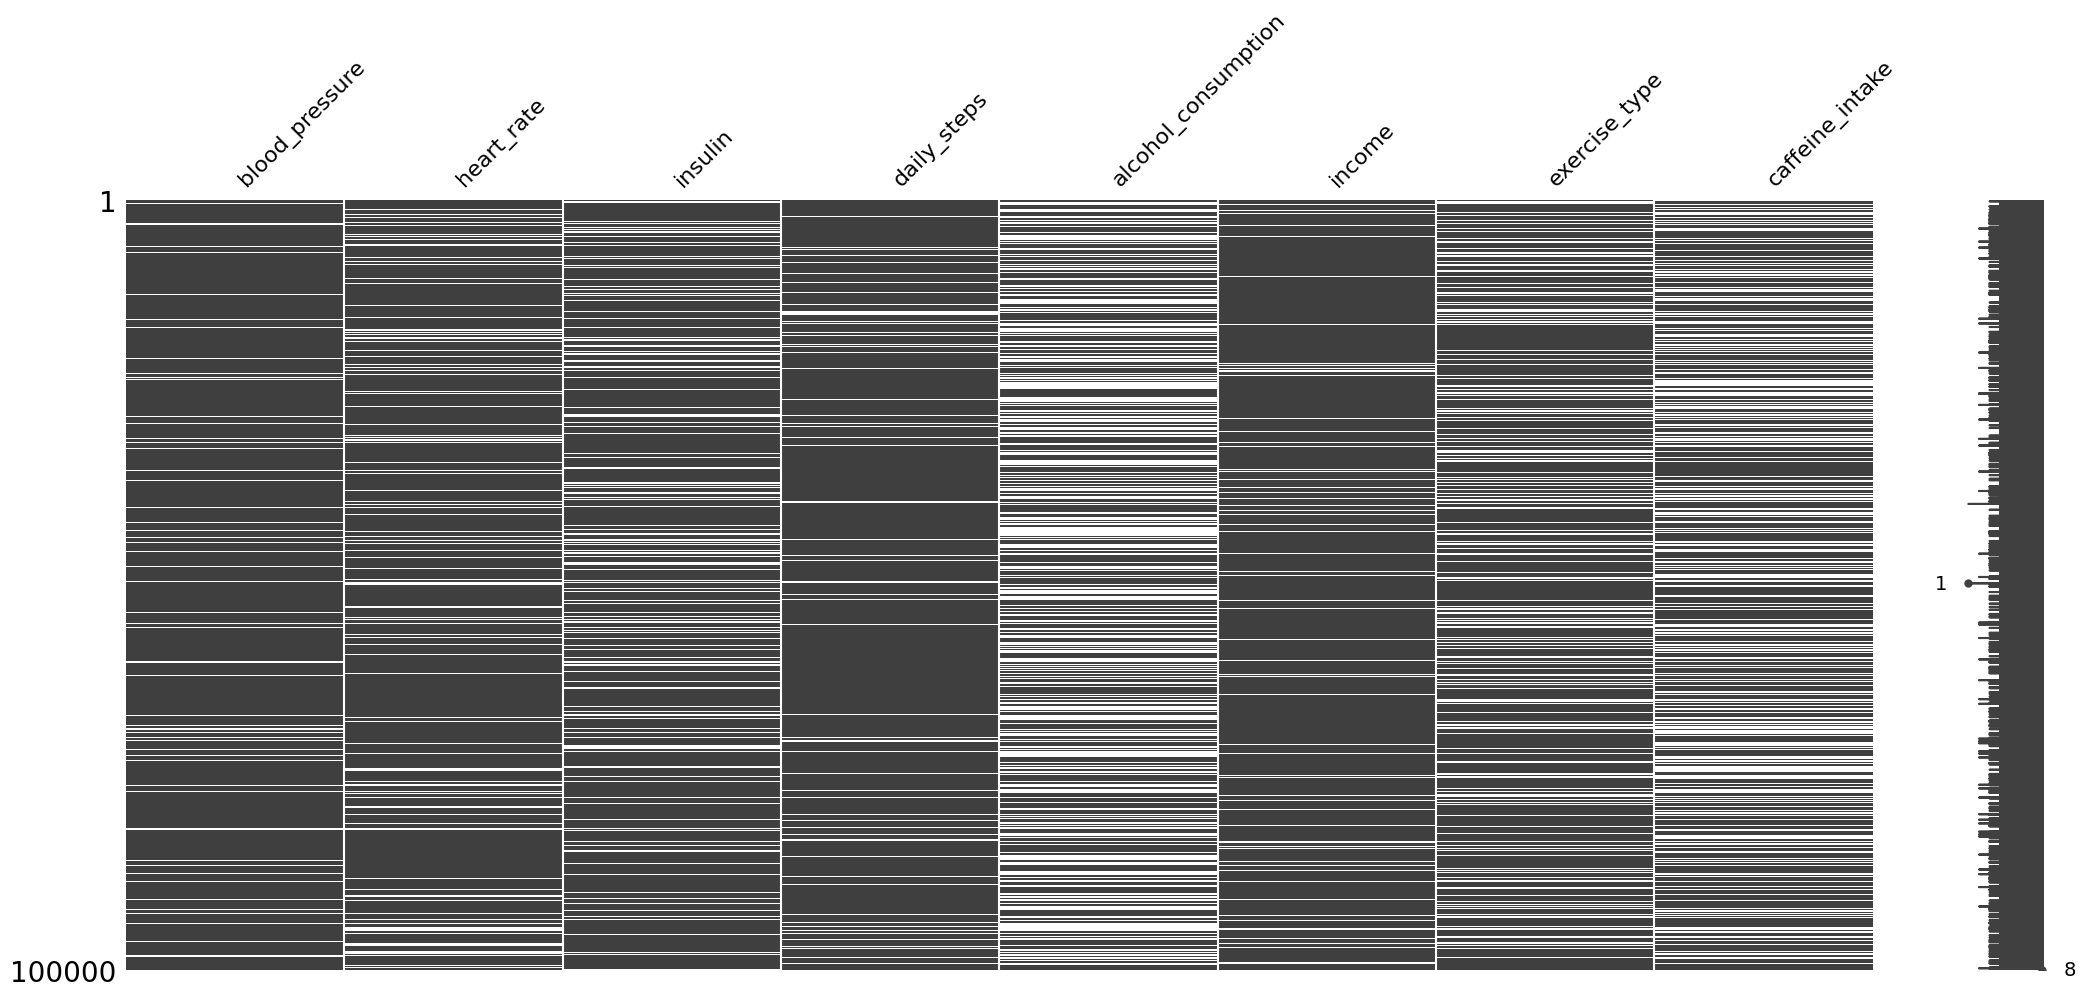

In [ ]:
null_df = health_df[[col for col in health_df.columns if health_df[col].isnull().sum()>0]]
msno.matrix(null_df)

we could not see any close correlation of values between features with null values.

## Data Visualization(density graphs)

In [ ]:
health_df_continuous_columns = data_info_df[data_info_df['Variable Structure'].str.contains("Continuous") | data_info_df['Variable Structure'].str.contains("Cardinal")]["Variable"]
health_df_continuous_columns = [i for i in health_df_continuous_columns if i in health_df.columns]
print(health_df_continuous_columns)
print("length:",len(health_df_continuous_columns))

['insulin', 'heart_rate', 'income', 'daily_steps', 'blood_pressure', 'weight', 'age', 'height', 'sleep_hours', 'glucose', 'cholesterol', 'waist_size', 'bmi', 'work_hours', 'water_intake', 'screen_time', 'physical_activity', 'calorie_intake', 'sugar_intake', 'daily_supplement_dosage']
length: 20


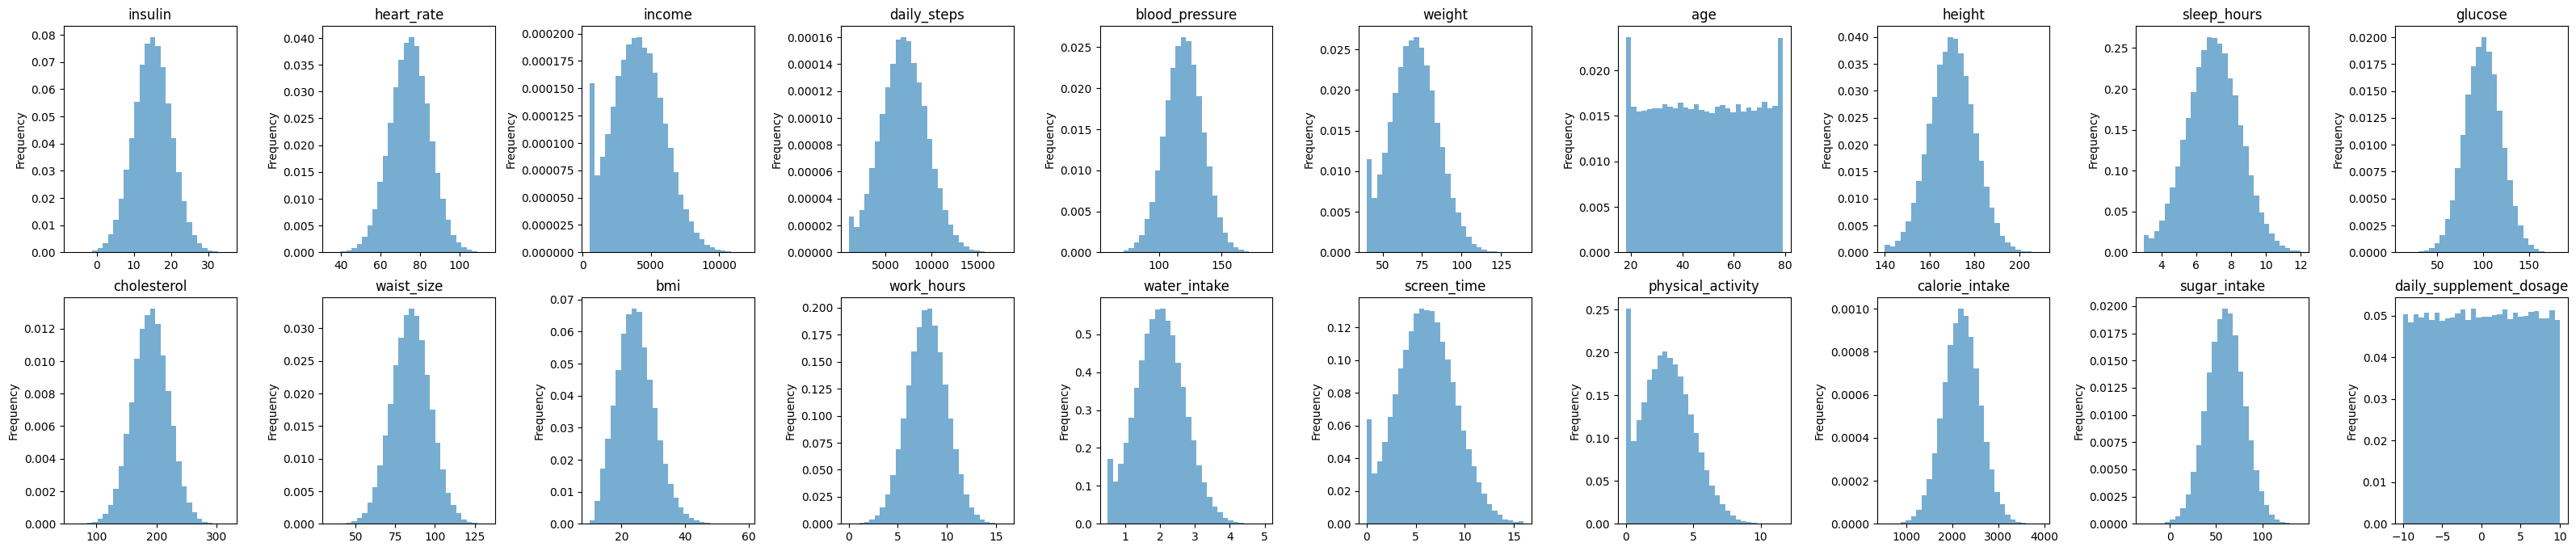

In [ ]:
# for continuous/cardinal columns
fig, axs = plt.subplots(2, 10, figsize=(40, 8))
axs = axs.flatten()

for ax, col in zip(axs, health_df_continuous_columns):
    health_df[col].plot(kind="hist", density=True, bins=30, alpha=0.6, ax=ax)
    ax.set_title(col)
plt.subplots_adjust(wspace=0.5)

In [ ]:
health_df_categorical_columns = data_info_df[data_info_df['Variable Structure'].str.contains("Ordinal") | data_info_df['Variable Structure'].str.contains("Nominal")]["Variable"]
health_df_categorical_columns = [i for i in health_df_categorical_columns if i in health_df.columns]
print(health_df_categorical_columns)
print("Length:",len(health_df_categorical_columns))

['alcohol_consumption', 'caffeine_intake', 'exercise_type', 'gender', 'sleep_quality', 'stress_level', 'mental_health_score', 'smoking_level', 'occupation', 'job_type', 'education_level', 'mental_health_support', 'healthcare_access', 'insurance', 'diet_type', 'device_usage', 'meals_per_day', 'sunlight_exposure', 'pet_owner', 'family_history', 'target']
Length: 21


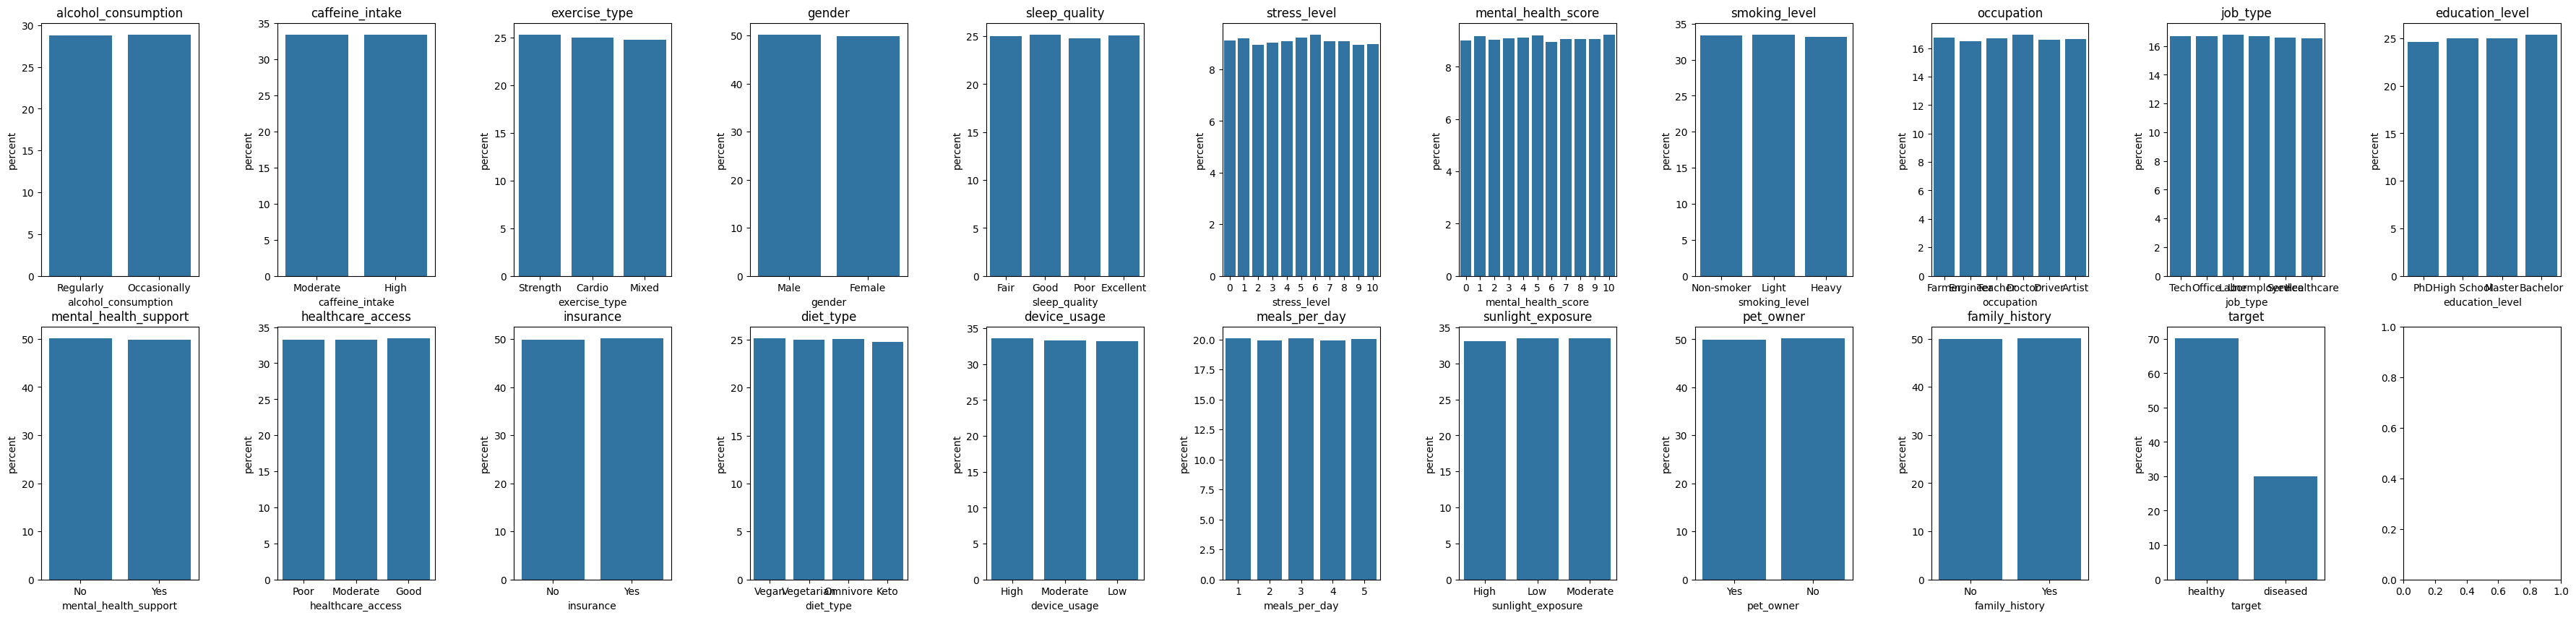

In [ ]:
# for categorical values
fig, axs = plt.subplots(2, 11, figsize=(45, 10))
axs = axs.flatten()

for ax, col in zip(axs, health_df_categorical_columns):
    sns.countplot(
        x=col,
        data=health_df,
        stat="percent",
        ax=ax
    )
    ax.set_title(col)
plt.subplots_adjust(wspace=0.5) # renklendirme yap
# yükseklik önemli değil, dataları kendi içinde sırala

## Train-Validation-Test split

In [ ]:
# bu kısmı atlama
# train valid test için target dengesi lazım
X = health_df.drop(columns="target")
y = health_df["target"]
X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.2,random_state=42,stratify=y
)
print("X_train:",X_train.shape)
print("X_test:",X_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)

X_train: (80000, 41)
X_test: (20000, 41)
y_train: (80000,)
y_test: (20000,)


In [ ]:
print(y.value_counts(normalize=True))
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

target
healthy     0.70097
diseased    0.29903
Name: proportion, dtype: float64
target
healthy     0.700975
diseased    0.299025
Name: proportion, dtype: float64
target
healthy     0.70095
diseased    0.29905
Name: proportion, dtype: float64


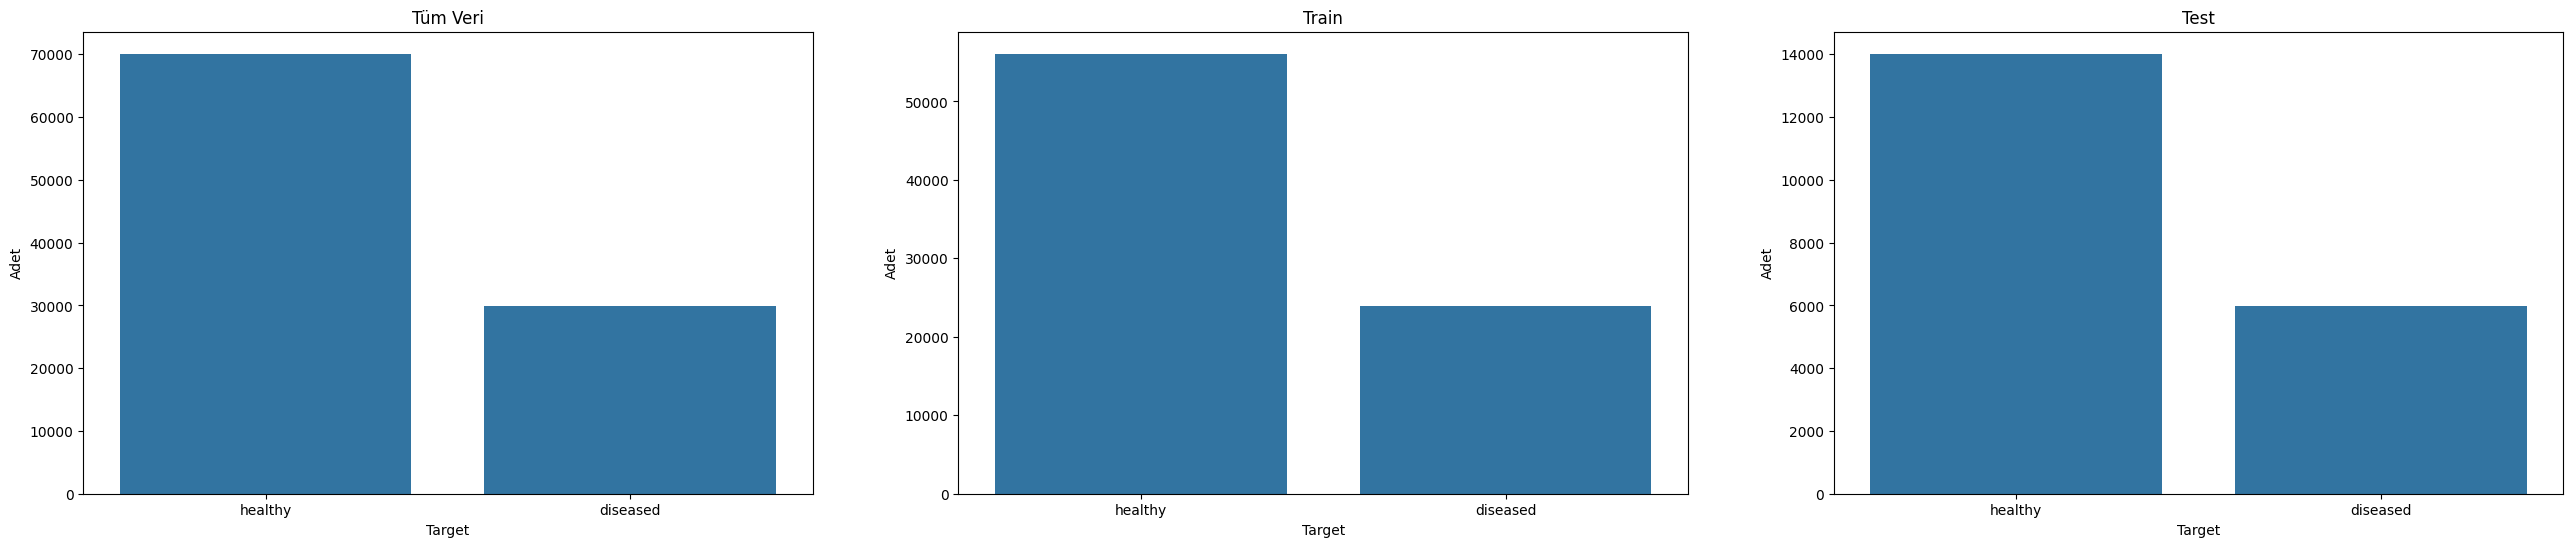

In [ ]:
# count gösterimi
fig, axs = plt.subplots(1, 3, figsize=(32, 6))

datasets = [y, y_train, y_test]
titles = ["Tüm Veri", "Train", "Test"]

for ax, data, title in zip(axs, datasets, titles):
    sns.countplot(x=data, ax=ax)
    ax.set_title(title)
    ax.set_xlabel("Target")
    ax.set_ylabel("Adet")

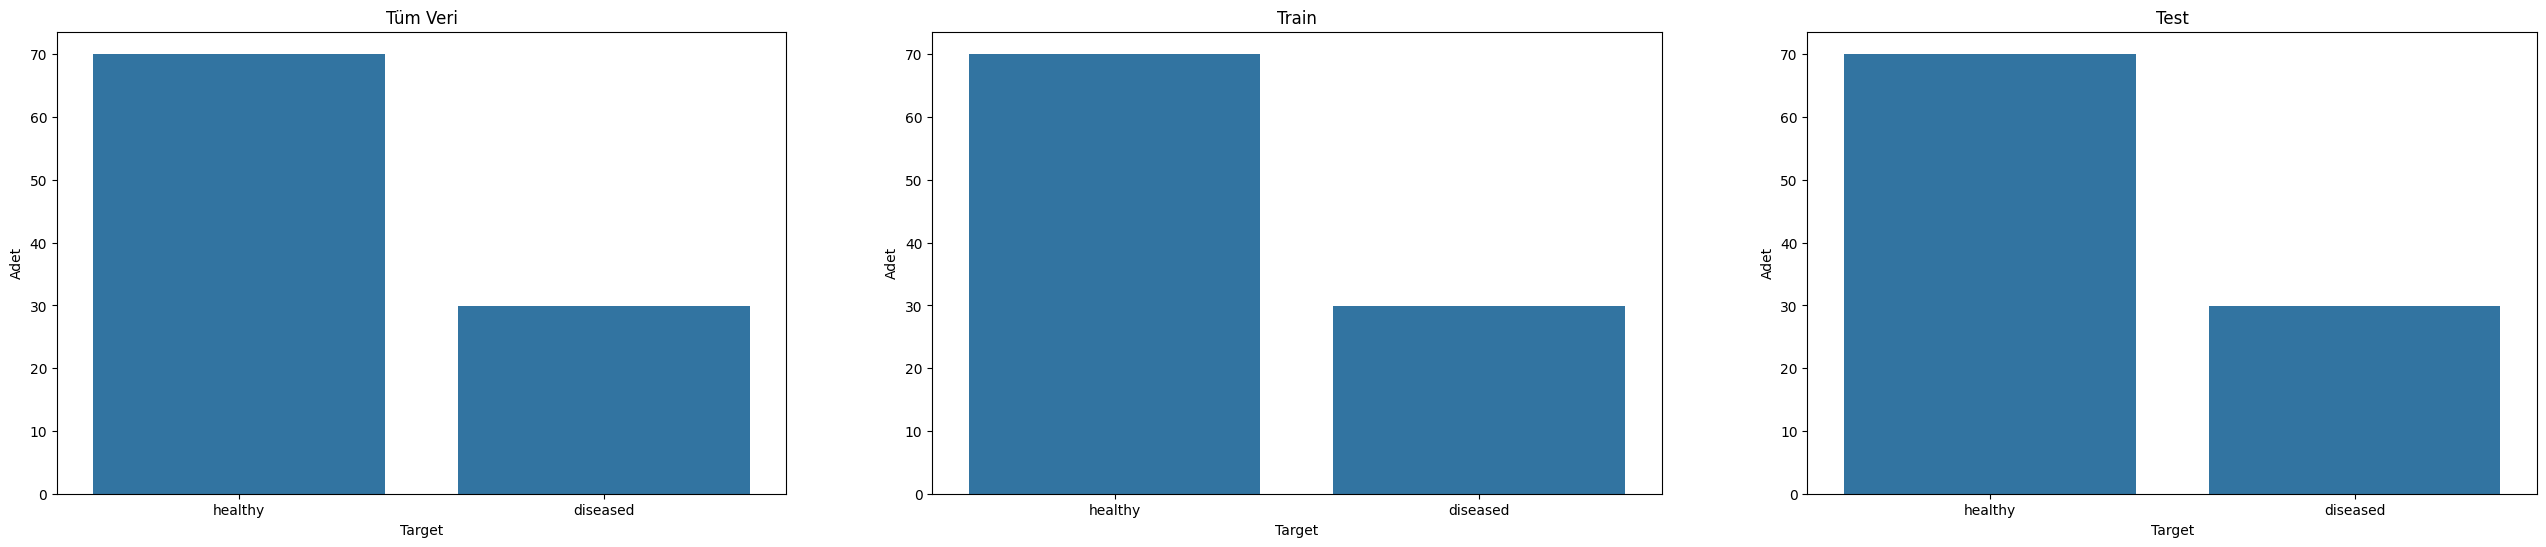

In [ ]:
# yüzde gösterimi
fig, axs = plt.subplots(1, 3, figsize=(32, 6))

datasets = [y, y_train, y_test]
titles = ["Tüm Veri", "Train", "Test"]

for ax, data, title in zip(axs, datasets, titles):
    sns.countplot(x=data, ax=ax, stat="percent")
    ax.set_title(title)
    ax.set_xlabel("Target")
    ax.set_ylabel("Adet")

Save Train Test Data

In [ ]:
X_train.to_csv("X_train.csv")
X_test.to_csv("X_test.csv")
y_train.to_csv("y_train.csv")
y_test.to_csv("y_test.csv")

## Outlier Handling

download data

In [ ]:
X_train = pd.read_csv("/content/drive/MyDrive/Dokümantasyon/7. Hafta/Main Project: Health Analysis/X_train.csv")
X_test = pd.read_csv("/content/drive/MyDrive/Dokümantasyon/7. Hafta/Main Project: Health Analysis/X_test.csv")
y_train = pd.read_csv("/content/drive/MyDrive/Dokümantasyon/7. Hafta/Main Project: Health Analysis/y_train.csv")
y_test = pd.read_csv("/content/drive/MyDrive/Dokümantasyon/7. Hafta/Main Project: Health Analysis/y_test.csv")

https://www.geeksforgeeks.org/data-analysis/what-is-outlier-detection/

Z = (X - avg(X)) / std(X)

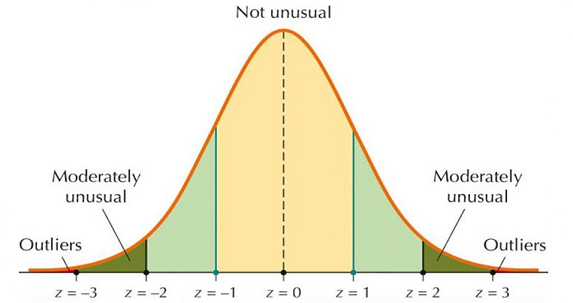

<Axes: ylabel='Frequency'>

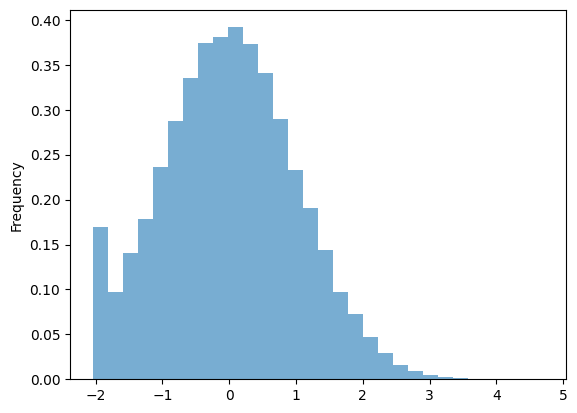

In [ ]:
Z = (X_train["weight"] - X_train["weight"].mean()) / X_train["weight"].std()
Z.plot(kind="hist", density=True, bins=30, alpha=0.6)

<Axes: ylabel='weight'>

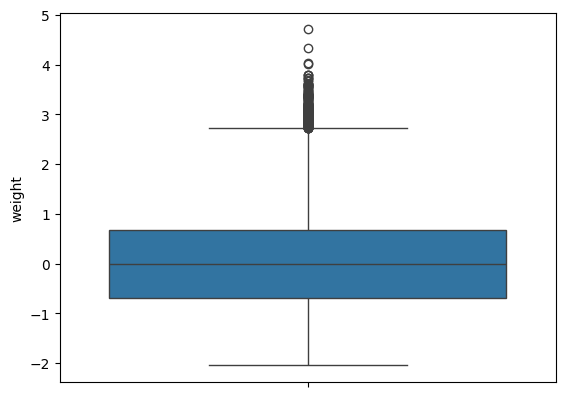

In [ ]:
sns.boxplot(data=Z)

## Filling null values
data filling and clearing will be held on FillData notebook

In [ ]:
# train test'i kaydet, ardından gerekli işlemleri buradan devam et.